In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
pd.set_option('display.max_rows', 7)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/PenguinsBinaryClassification.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2009
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,2009
273,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,2009


In [ ]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
year,0


In [ ]:
df['species'] = df['species'].replace('Adelie', 0)
df['species'] = df['species'].replace('Gentoo', 1)
df['island'] = df['island'].replace('Torgersen', 0)
df['island'] = df['island'].replace('Dream', 1)
df['island'] = df['island'].replace('Biscoe', 2)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,0,0,39.1,18.7,181.0,3750.0,2007
1,0,0,39.5,17.4,186.0,3800.0,2007
2,0,0,40.3,18.0,195.0,3250.0,2007
...,...,...,...,...,...,...,...
271,1,2,50.4,15.7,222.0,5750.0,2009
272,1,2,45.2,14.8,212.0,5200.0,2009
273,1,2,49.9,16.1,213.0,5400.0,2009


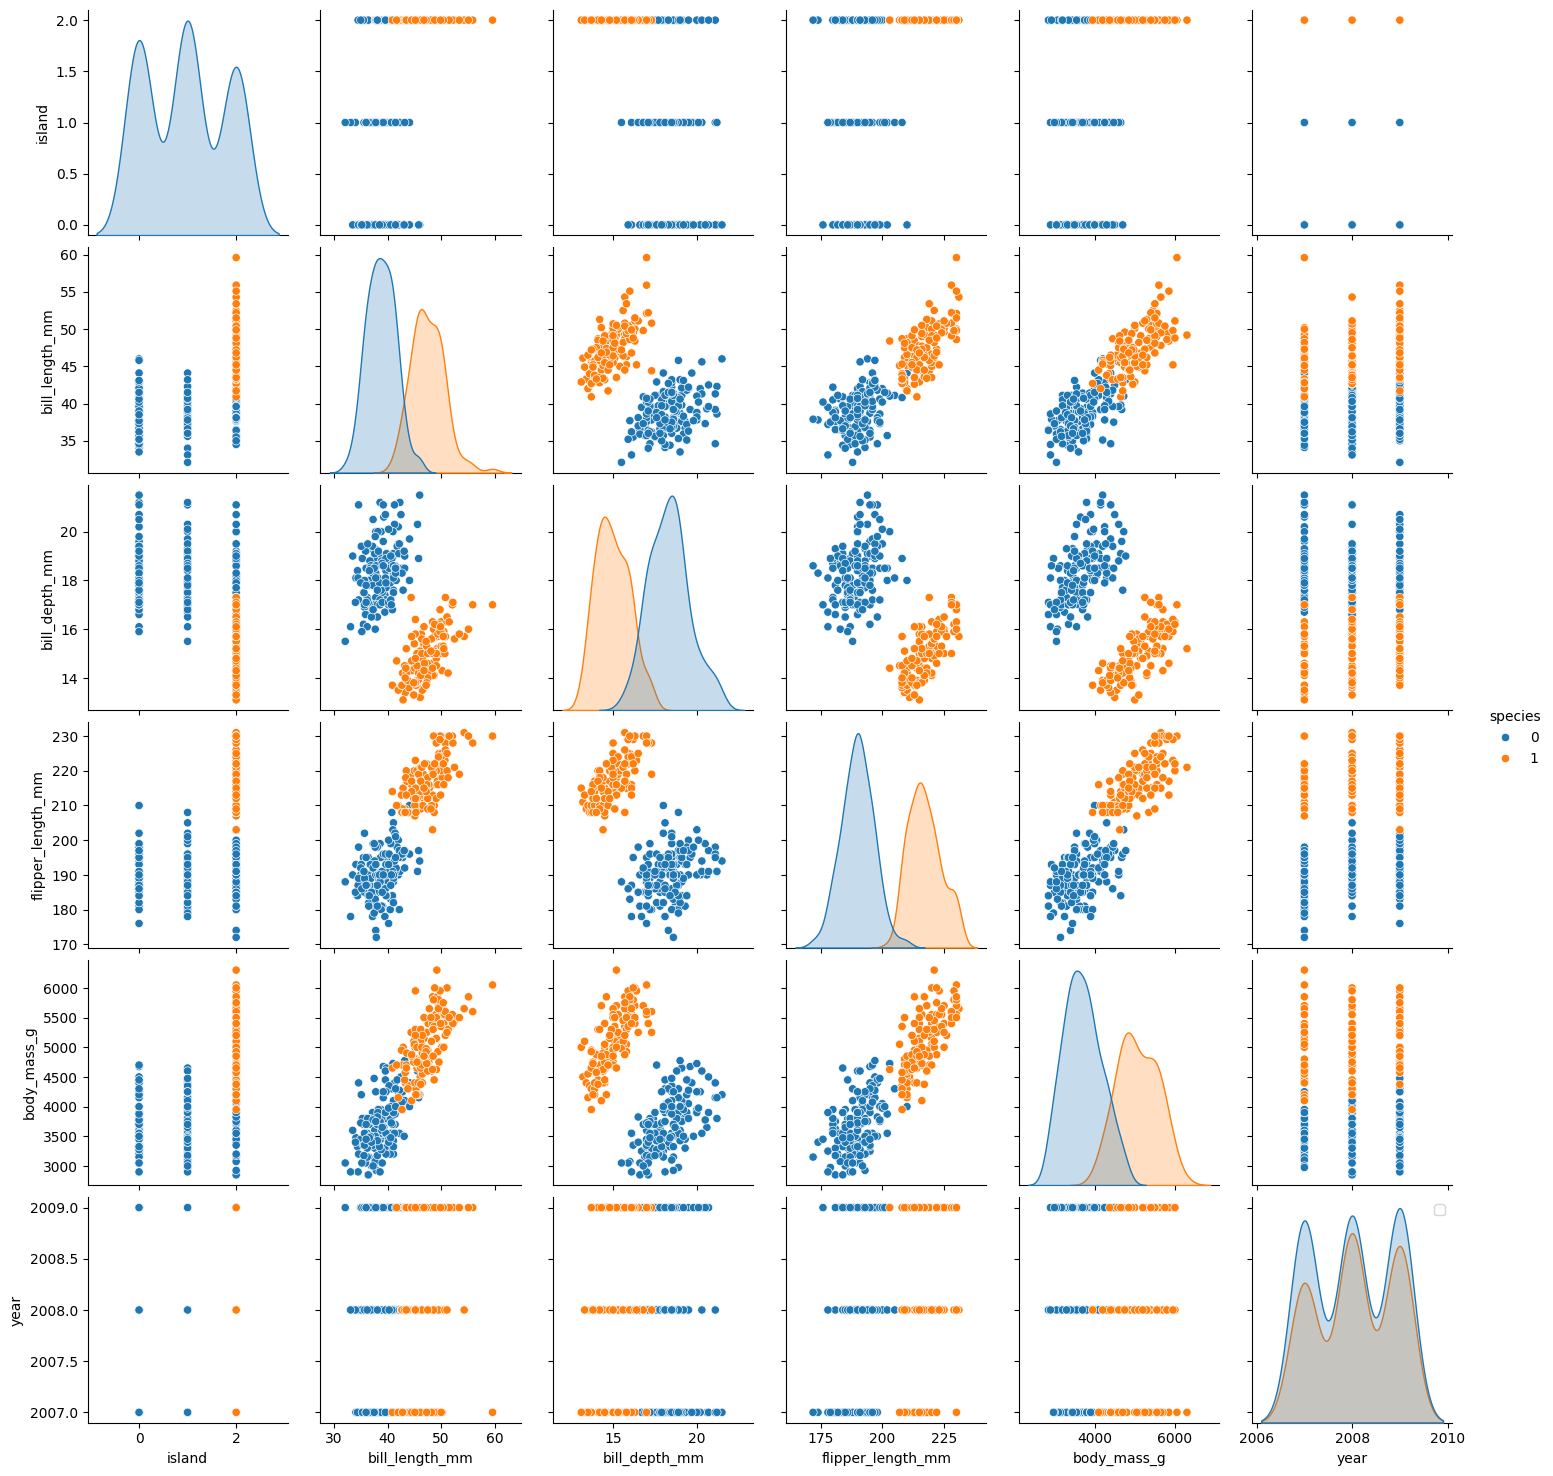

In [ ]:
sns.pairplot(df, hue='species')
plt.legend()

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm', axis=None)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
species,1.000000,0.662893,0.835687,-0.832606,0.901796,0.819837,0.032942
island,0.662893,1.000000,0.553917,-0.559274,0.562413,0.544047,0.074625
bill_length_mm,0.835687,0.553917,1.000000,-0.546050,0.869026,0.876905,0.086799
bill_depth_mm,-0.832606,-0.559274,-0.546050,1.000000,-0.640141,-0.483223,-0.051973
flipper_length_mm,0.901796,0.562413,0.869026,-0.640141,1.000000,0.882262,0.150004
body_mass_g,0.819837,0.544047,0.876905,-0.483223,0.882262,1.000000,0.034148
year,0.032942,0.074625,0.086799,-0.051973,0.150004,0.034148,1.000000


In [ ]:
X = df.iloc[:,1:]
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,0,39.1,18.7,181.0,3750.0,2007
1,0,39.5,17.4,186.0,3800.0,2007
2,0,40.3,18.0,195.0,3250.0,2007
...,...,...,...,...,...,...
271,2,50.4,15.7,222.0,5750.0,2009
272,2,45.2,14.8,212.0,5200.0,2009
273,2,49.9,16.1,213.0,5400.0,2009


In [ ]:
y = df.iloc[:,0:1]
y

,species
0,0
1,0
2,0
...,...
271,1
272,1
273,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
model

LogisticRegression()

In [ ]:
print(f'Train_acc：{accuracy_score(y_train, model.predict(x_train))}')
print(f'Test_acc ：{accuracy_score(y_test, model.predict(x_test))}')

Train_acc：1.0
Test_acc ：1.0


In [ ]:
sub = pd.DataFrame(model.predict(x_test))
sub.columns = ["species"]
sub

,species
0,0
1,0
2,1
...,...
80,1
81,0
82,0


In [ ]:
sub.to_csv('submission.csv', index=False)